In [1]:
# Shopping Mall project clustering and identification of sales period and pattern

In [ ]:
# importing Requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
os.getcwd()

In [5]:
cust=pd.read_excel("Customer_Segment.xlsx")
cust.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'Customer_Segment.xlsx'

# Problem statement

### Segment(Group/Cluster) customer on basis on their buying pattern RFM(Recency frequency Monetary)



In [4]:
# obsevrving the key features of data frame
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
# number of unique value in each column
cust.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
# Calculation of  RFM  dropping unwanted variables 
cust=cust.drop(["StockCode","Description","Country","lower"],axis=1)
cust.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [7]:
# Finding the missing value
cust.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

### Key observations:
### The missing values in Customer ID is due to "Cash Sales"
### Because we can not track the customer those who have done Cash sales we can't track them and hence We can remove such rows.

In [8]:
cust.dropna(axis=0,how="any",subset=["CustomerID"],inplace=True)

In [9]:
cust.isnull().sum() 

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [10]:
# Don't see any missing values 

In [11]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [12]:
cust.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# To find out how many items have unit price as 0
cust[cust["UnitPrice"]==0]["UnitPrice"].count()

40

In [14]:
# Displaying the items with Unit Price '0'
cust[cust["UnitPrice"]==0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [15]:
# Counting  number of observation having Sales Retrun or Negative quantity 
cust[cust["Quantity"]<0].count()

InvoiceNo      8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
dtype: int64

In [16]:
cust[cust["Quantity"]<-10000].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C541433    -74215    2011-01-18 10:17:00  1.04       12346.0       1
C581484    -80995    2011-12-09 09:27:00  2.08       16446.0       1
dtype: int64

In [17]:
cust.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


### Creating a column Total ( to find the total price item wise)

In [18]:
cust["Total"]=cust["Quantity"]*cust["UnitPrice"]
cust.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [19]:
#  Dropping the quantity and unit price column

In [20]:
cust=cust.drop(["Quantity","UnitPrice"],axis=1)
cust.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [21]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.5+ MB


### Applying groupby function to calculate the total amount with respect to dedicated Invoice No. 

In [22]:
# creating df2 dataframe with two columns Invoice no. and Total
cust1=cust.drop(["InvoiceDate","CustomerID"],axis=1)
cust1

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34
...,...,...
541904,581587,10.20
541905,581587,12.60
541906,581587,16.60
541907,581587,16.60


In [23]:
# calculate the final total amout w,r,t dedicated unique Invoice no.
cust1=cust1.groupby(["InvoiceNo"]).sum()
cust1.head(100)

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
536569,357.95
536570,304.34
536571,294.62


In [24]:
cust1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 536365 to C581569
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   22190 non-null  float64
dtypes: float64(1)
memory usage: 346.7+ KB


In [25]:
cust1_final=cust1.reset_index()
cust1_final.head()


,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [26]:
cust1_final.info

<bound method DataFrame.info of       InvoiceNo      Total
0        536365     139.12
1        536366      22.20
2        536367     278.73
3        536368      70.05
4        536369      17.85
...         ...        ...
22185   C581484 -168469.60
22186   C581490     -32.53
22187   C581499    -224.69
22188   C581568     -54.75
22189   C581569      -7.50

[22190 rows x 2 columns]>

In [27]:
cust.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [28]:
cust=cust.drop(["Total"],axis=1)
cust.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0
2,536365,2010-12-01 08:26:00,17850.0
3,536365,2010-12-01 08:26:00,17850.0
4,536365,2010-12-01 08:26:00,17850.0


In [29]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.4+ MB


In [30]:
# cust dataframe has large no. of observation /rows becuase of duplicate invoice no.

In [31]:
# Dropping the duplicate values or invoice no
cust_final=cust.drop_duplicates(subset="InvoiceNo")
cust_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0
21,536368,2010-12-01 08:34:00,13047.0
25,536369,2010-12-01 08:35:00,13047.0


In [32]:
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22190 entries, 0 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 693.4+ KB


In [33]:
# We have equal no. of observation in cust_final and cust1_final
# we can merge these two dataframe
customer_final=pd.merge(cust_final,cust1_final,how="left",on="InvoiceNo")
customer_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22185,581583,2011-12-09 12:23:00,13777.0,124.60
22186,581584,2011-12-09 12:25:00,13777.0,140.64
22187,581585,2011-12-09 12:31:00,15804.0,329.05
22188,581586,2011-12-09 12:49:00,13113.0,339.20


In [34]:
customer_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22185,581583,2011-12-09 12:23:00,13777.0,124.60
22186,581584,2011-12-09 12:25:00,13777.0,140.64
22187,581585,2011-12-09 12:31:00,15804.0,329.05
22188,581586,2011-12-09 12:49:00,13113.0,339.20


In [35]:
# Calculation of the oldest date of invoice and latest date of invoice

In [36]:
max(customer_final["InvoiceDate"])# Latest date  of Invoice

Timestamp('2011-12-09 12:50:00')

In [37]:
min(customer_final["InvoiceDate"])# Oldest date of Invoice

Timestamp('2010-12-01 08:26:00')

In [38]:
# Creating a latest date just 2 days more than the Last date of invoice

In [39]:
import datetime as dt
latest_date=dt.datetime(2011,12,11)
latest_date

datetime.datetime(2011, 12, 11, 0, 0)

In [40]:
#  The Latest date has been set as Dec 11th 2011

In [41]:
# We will use Aggregation function and calculate Recency Frequency and Monetary values  as per Customer ID

In [42]:
RFM_Score=customer_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
     "InvoiceNo":lambda x:x.count(),"Total":lambda x:x.sum()})

In [43]:
RFM_Score.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [44]:
RFM_Score=RFM_Score.reset_index()
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [45]:
# Renaming the column as R F M
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [46]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [47]:
RFM_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Recency     4372 non-null   int64  
 2   Frequency   4372 non-null   int64  
 3   Monetary    4372 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


In [48]:
RFM_Score.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.581199,5.075480,1898.459701
std,1722.390705,100.772139,9.338754,8219.345141
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,293.362500
50%,15300.500000,51.000000,3.000000,648.075000
75%,16778.250000,144.000000,5.000000,1611.725000
max,18287.000000,374.000000,248.000000,279489.020000


<AxesSubplot:xlabel='Recency', ylabel='Density'>

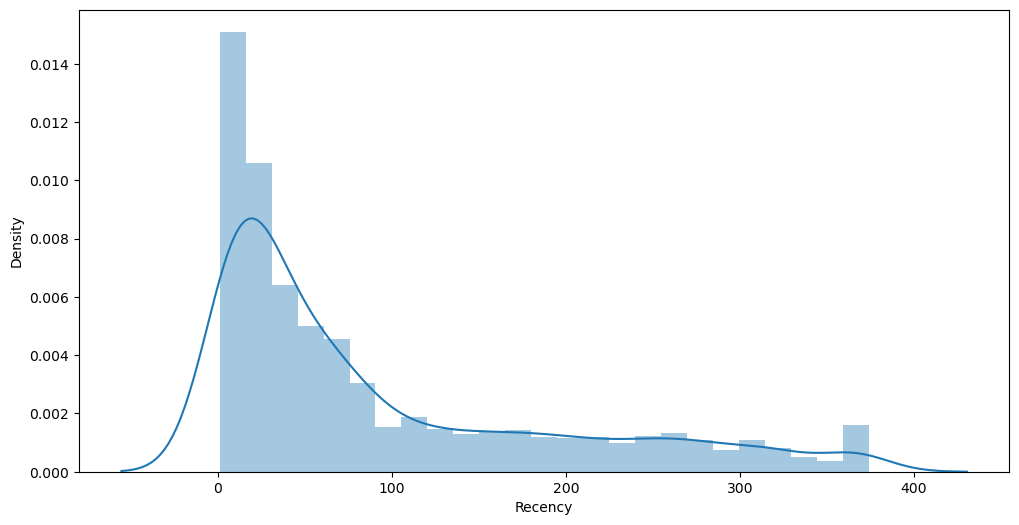

In [49]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(RFM_Score["Recency"],kde=True)

[Text(0.5, 0, 'Recency')]

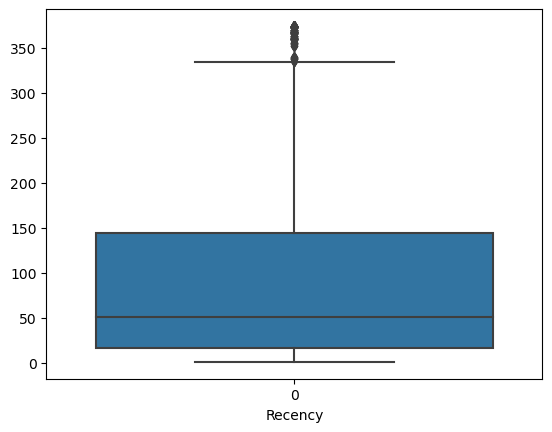

In [50]:
sns.boxplot(RFM_Score['Recency']).set(xlabel='Recency')

In [51]:
# setting the benchmark using quantile method

In [52]:
RFM_Score["Recency"].quantile(q=[0.25,0.50,0.75])

0.25     17.0
0.50     51.0
0.75    144.0
Name: Recency, dtype: float64

In [53]:
# ECDF Plot using Seaborn

<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

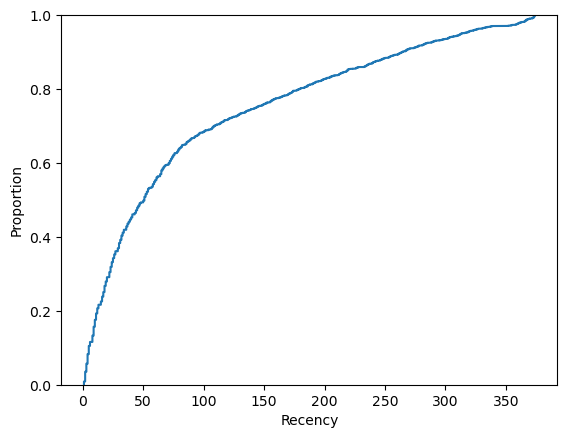

In [54]:
sns.ecdfplot(data=RFM_Score["Recency"])

In [55]:
# Different Quartile Range and checking the RFM Score 

In [56]:
RFM_Score["Recency"].quantile(q=[0.30,0.53,0.767])

0.300     22.0
0.530     54.0
0.767    156.0
Name: Recency, dtype: float64

In [57]:
# Frequency

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

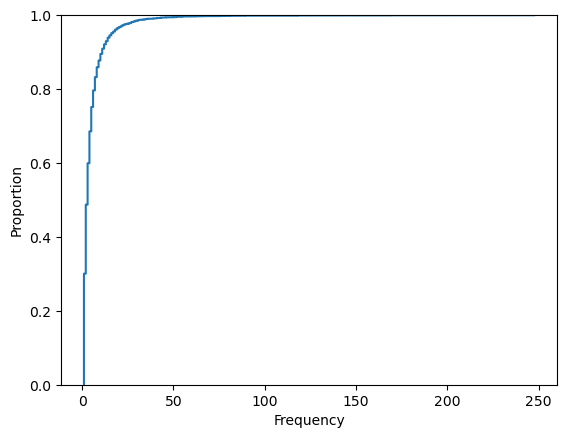

In [58]:
sns.ecdfplot(data=RFM_Score["Frequency"])

In [59]:
RFM_Score["Frequency"].quantile(q=[0.25,0.50,0.75])

0.25    1.0
0.50    3.0
0.75    5.0
Name: Frequency, dtype: float64

In [60]:
RFM_Score["Frequency"].quantile(q=[0.98,0.995,0.998]) # Different Quartile Range. 

0.980    27.000
0.995    52.000
0.998    78.032
Name: Frequency, dtype: float64

In [61]:
# Monetary

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

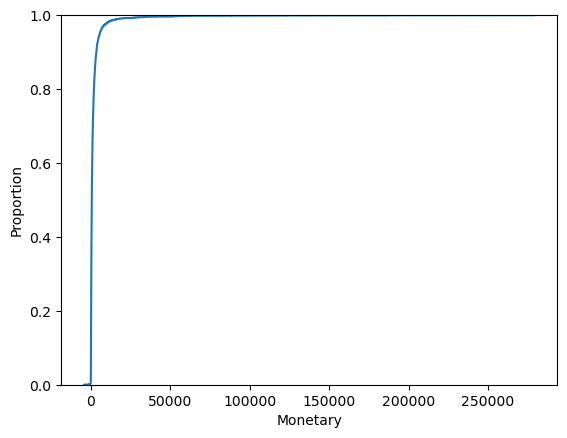

In [62]:
sns.ecdfplot(data=RFM_Score["Monetary"])

In [63]:
print(min(RFM_Score["Monetary"]))
print(max(RFM_Score["Monetary"]))

-4287.63
279489.01999999996


In [64]:
RFM_Score["Monetary"].quantile(q=[0.98,0.995,0.998])

0.980    10491.03700
0.995    33380.25120
0.998    60253.65008
Name: Monetary, dtype: float64

In [65]:
RFM_Score["Monetary"].quantile(q=[0.65,0.95,0.998])

0.650     1079.02600
0.950     5625.00400
0.998    60253.65008
Name: Monetary, dtype: float64

In [66]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


In [67]:
quantile100=RFM_Score.quantile(q=[0.30,0.53,0.767])
quantile200=RFM_Score.quantile(q=[0.98,0.995,0.998])
quantile300=RFM_Score.quantile(q=[0.65,0.95,0.998])

In [68]:
quantile100

,CustomerID,Recency,Frequency,Monetary
0.300,14110.300,22.0,1.0,337.37000
0.530,15479.260,54.0,3.0,705.79410
0.767,16882.557,156.0,6.0,1737.76684


In [69]:
quantile200

,CustomerID,Recency,Frequency,Monetary
0.980,18170.580,362.0,27.000,10491.03700
0.995,18255.145,373.0,52.000,33380.25120
0.998,18273.258,374.0,78.032,60253.65008


In [70]:
# Now we can paas this quantile to R F M scores to customers

In [71]:
# Recency
def R_Scoring(x,p,d):
    if x<=d[p][0.30]:
        return 4
    elif x<=d[p][0.53]: 
        return 3
    elif x<=d[p][0.767]:
        return 2
    else:
        return 1
    

In [72]:
# Frequency
def F_Scoring(x,p,d):
    if x<=d[p][0.98]:
        return 1
    elif x<=d[p][0.995]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

In [73]:
# Monetary
def M_Scoring(x,p,d):
    if x<=d[p][0.65]:
        return 1
    elif x<=d[p][0.95]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

### Creation of new column R F M and Marking the Quantile variable 

In [74]:
RFM_Score["R"]=RFM_Score["Recency"].apply(R_Scoring,args=("Recency",quantile100))
RFM_Score["F"]=RFM_Score["Frequency"].apply(F_Scoring,args=("Frequency",quantile200))
RFM_Score["M"]=RFM_Score["Monetary"].apply(M_Scoring,args=("Monetary",quantile300))

In [75]:
RFM_Score.head(100)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,2,0.00,1,1,1
1,12347.0,3,7,4310.00,4,1,2
2,12348.0,76,4,1797.24,2,1,2
3,12349.0,19,1,1757.55,4,1,2
4,12350.0,311,1,334.40,1,1,1
...,...,...,...,...,...,...,...
95,12462.0,3,4,1124.01,4,1,2
96,12463.0,47,7,1303.63,3,1,2
97,12464.0,11,8,1212.05,4,1,2
98,12465.0,8,3,733.89,4,1,1


In [76]:
# Creation of RFM_ID for the customer
RFM_Score["RFM_ID"]=RFM_Score.R.map(str)+RFM_Score.F.map(str)+RFM_Score.M.map(str)
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID
0,12346.0,326,2,0.00,1,1,1,111
1,12347.0,3,7,4310.00,4,1,2,412
2,12348.0,76,4,1797.24,2,1,2,212
3,12349.0,19,1,1757.55,4,1,2,412
4,12350.0,311,1,334.40,1,1,1,111
...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111
4368,18281.0,181,1,80.82,1,1,1,111
4369,18282.0,8,3,176.60,4,1,1,411
4370,18283.0,4,16,2094.88,4,1,2,412


In [77]:
# Creating New Column RFM_Sum to calculate the RFM Values for each customer 
RFM_Score["RFM_Sum"]=RFM_Score[["R","F","M"]].sum(axis=1)

In [78]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum
0,12346.0,326,2,0.00,1,1,1,111,3
1,12347.0,3,7,4310.00,4,1,2,412,7
2,12348.0,76,4,1797.24,2,1,2,212,5
3,12349.0,19,1,1757.55,4,1,2,412,7
4,12350.0,311,1,334.40,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3
4368,18281.0,181,1,80.82,1,1,1,111,3
4369,18282.0,8,3,176.60,4,1,1,411,6
4370,18283.0,4,16,2094.88,4,1,2,412,7


#### Assigning loyality level


In [79]:
Loyality_level=["Silver","Gold","Diamond","Platinum"]
# Silver - Lower Level, Gold - Medium Level, Diamond -Higher Level, Platinum - Highest Level 

In [80]:
RFM_Score.RFM_ID.unique() # To find out all the RFM_ID values

array(['111', '412', '212', '312', '112', '313', '413', '211', '411',
       '311', '213', '314', '423', '422', '113', '443', '434', '433',
       '444', '333', '424', '122'], dtype=object)

In [81]:
RFM_Score.RFM_Sum.unique()

array([ 3,  7,  5,  6,  4,  8,  9, 11, 10, 12])

### qcut function allows for customizing the bucket sizes

In [82]:
RFM_Score["Loyality"]=pd.qcut(RFM_Score.RFM_Sum,q=4,labels=Loyality_level)

In [83]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,Loyality
0,12346.0,326,2,0.00,1,1,1,111,3,Silver
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum
4,12350.0,311,1,334.40,1,1,1,111,3,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum


In [84]:
### Scatterplot for Recency ,Frequecy ,Monetary

<AxesSubplot:xlabel='Monetary', ylabel='RFM_Sum'>

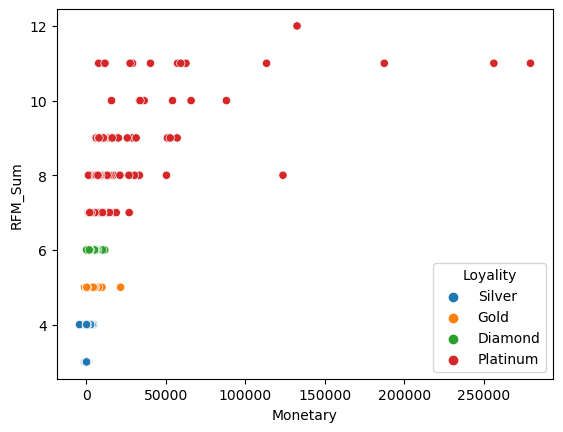

In [85]:
sns.scatterplot(data=RFM_Score, x="Monetary", y="RFM_Sum", hue="Loyality")

<AxesSubplot:xlabel='Recency', ylabel='RFM_Sum'>

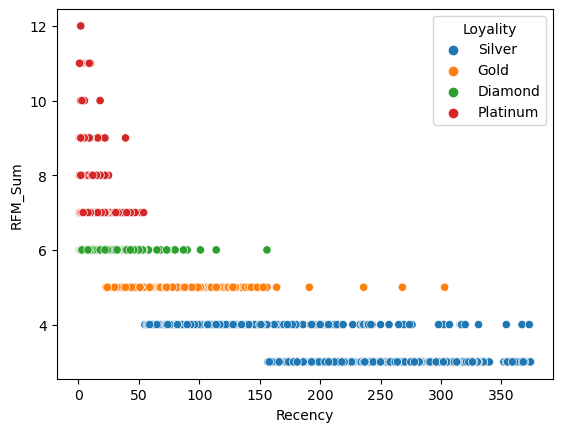

In [86]:
sns.scatterplot(data=RFM_Score, x="Recency", y="RFM_Sum", hue="Loyality")

<AxesSubplot:xlabel='Frequency', ylabel='RFM_Sum'>

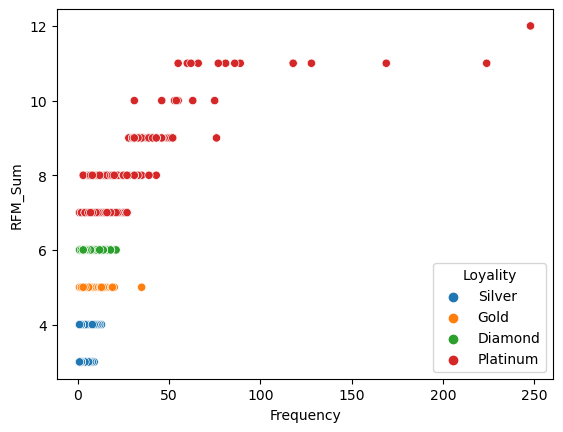

In [87]:
sns.scatterplot(data=RFM_Score, x="Frequency", y="RFM_Sum", hue="Loyality")

In [88]:
New_df=RFM_Score[["RFM_Sum"]]
New_df

,RFM_Sum
0,3
1,7
2,5
3,7
4,3
...,...
4367,3
4368,3
4369,6
4370,7


### Applying the K-Means Clustering Algorithm

In [89]:
from sklearn.cluster import KMeans

SSE=[]

for K in range (1,30):
    Kmeans=KMeans(n_clusters=K,init="k-means++")
    Kmeans.fit(New_df)
    SSE.append(Kmeans.inertia_)


In [90]:
frame=pd.DataFrame({"cluster":range(1,30),"SSE":SSE})

Text(0, 0.5, 'Inertia')

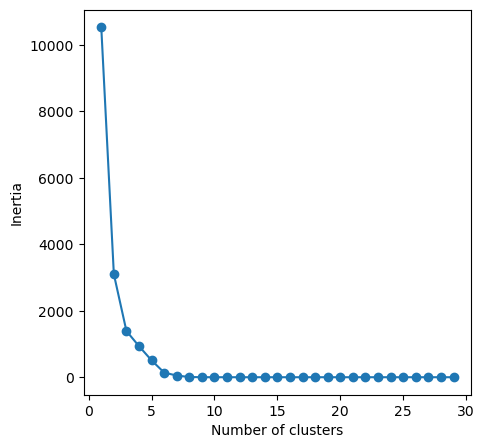

In [91]:
plt.figure(figsize=(5,5))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

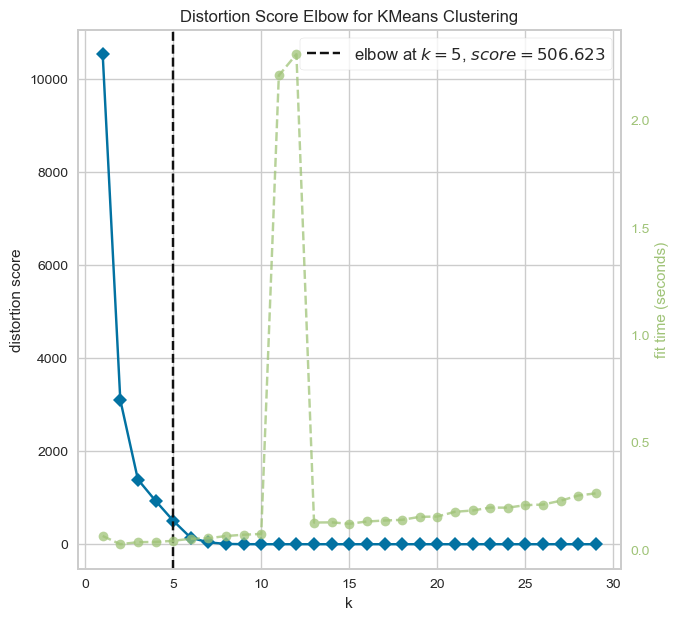

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(7,7))
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(New_df)
visualizer.show()

In [93]:
# apply the best k value in kmeans algorith

In [94]:
Km=KMeans(n_clusters=5,init="k-means++",max_iter=100,random_state=100)
y_km=Km.fit_predict(New_df)
y_km

array([2, 1, 4, ..., 3, 1, 3], dtype=int32)

In [95]:
RFM_Score["Cluster"]=Km.labels_
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,Loyality,Cluster
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,2
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,1
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,4
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,1
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,2
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,2
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,2
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,3
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum,1


In [96]:
# Creating segments based on RFM_ID

In [97]:
seg_map={
    r'[1][1-2][2-3]':"Inactive",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    #r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'Target-upsell',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFM_Score["Segment"]=RFM_Score["RFM_ID"].replace(seg_map,regex=True)

In [98]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_Sum,Loyality,Cluster,Segment
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,2,new customer
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,1,Nurture
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,4,new customer
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,1,Nurture
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,2,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,2,new customer
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,2,new customer
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,3,Target-upsell
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum,1,Nurture


In [99]:
# creation of the Pie chart

In [100]:
RFM_Score["Segment"].value_counts()

new customer      1970
Target-upsell     1144
Nurture            971
Drive_Loyality     183
Inactive            72
promising           20
at-Risk             12
Name: Segment, dtype: int64

In [101]:
# Pie plot using matplotlib 

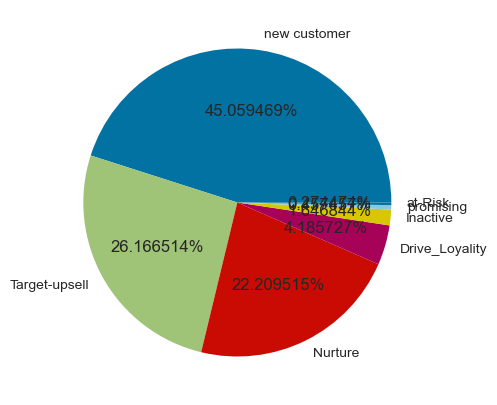

In [102]:
plt.figure(figsize=(9,5))
plt.pie(RFM_Score.Segment.value_counts(),labels=RFM_Score.Segment.value_counts().index,autopct="%2f%%")
plt.show()

In [103]:
# evaluation of silhoutte score

In [104]:
labels=Km.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(New_df,labels))

0.9277609615038378


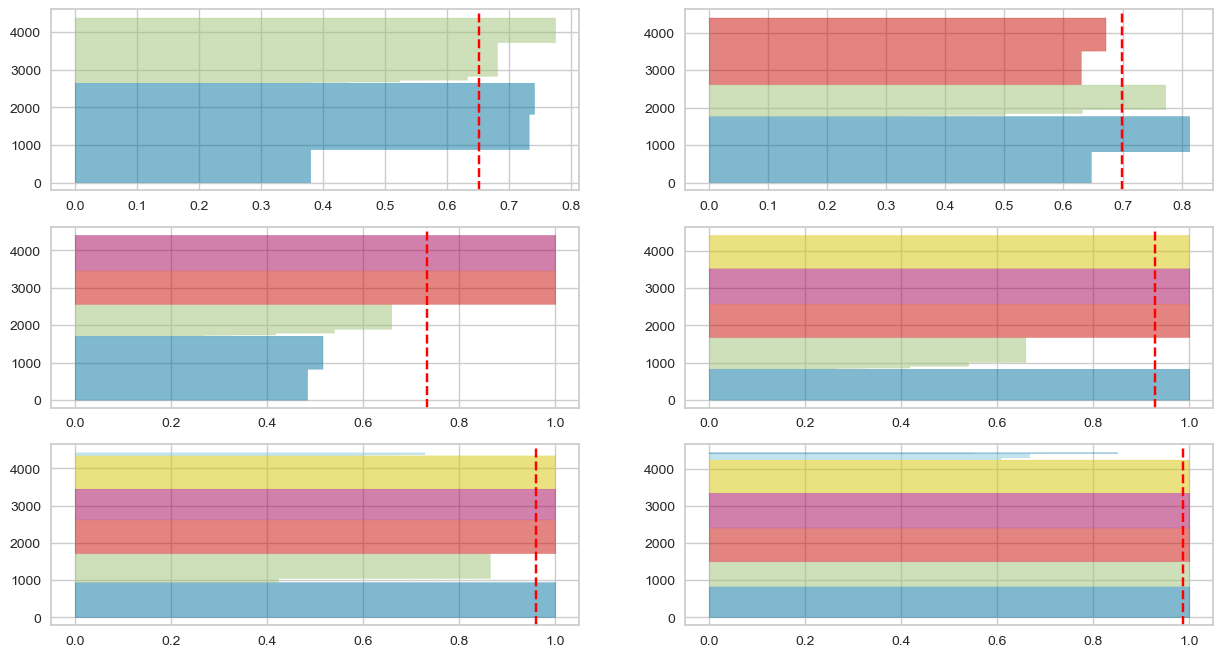

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
#
#
RFM_Score
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    '''
      
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(New_df) 

## To find business trends as per  (Day, Month, Season, Time) by Invoice counts

In [106]:
df=pd.read_excel("Customer_Segment.xlsx")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [108]:
df.head(10)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [109]:
# converting invoice date to date time format so that we can extract Day, Month, Time 
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [110]:
# Creating df1 DataFrame with only required columns (InvoiceNo, InvoiceDate)

df1 = df[['InvoiceNo', 'InvoiceDate','Quantity','UnitPrice']]
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,536365,2010-12-01 08:26:00,6,2.55
1,536365,2010-12-01 08:26:00,6,3.39
2,536365,2010-12-01 08:26:00,8,2.75
3,536365,2010-12-01 08:26:00,6,3.39
4,536365,2010-12-01 08:26:00,6,3.39
...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85
541905,581587,2011-12-09 12:50:00,6,2.10
541906,581587,2011-12-09 12:50:00,4,4.15
541907,581587,2011-12-09 12:50:00,4,4.15


In [111]:
import calendar as cr

In [112]:
cr.day_name[df1["InvoiceDate"][0].weekday()]

'Wednesday'

In [113]:
# Extract day from datetime column
def Extract_Day(d):
    return cr.day_name[d.weekday()]

In [114]:
df1["Day"]=df1["InvoiceDate"].apply(Extract_Day)
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day
0,536365,2010-12-01 08:26:00,6,2.55,Wednesday
1,536365,2010-12-01 08:26:00,6,3.39,Wednesday
2,536365,2010-12-01 08:26:00,8,2.75,Wednesday
3,536365,2010-12-01 08:26:00,6,3.39,Wednesday
4,536365,2010-12-01 08:26:00,6,3.39,Wednesday
...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,Friday
541905,581587,2011-12-09 12:50:00,6,2.10,Friday
541906,581587,2011-12-09 12:50:00,4,4.15,Friday
541907,581587,2011-12-09 12:50:00,4,4.15,Friday


<AxesSubplot:xlabel='Day', ylabel='count'>

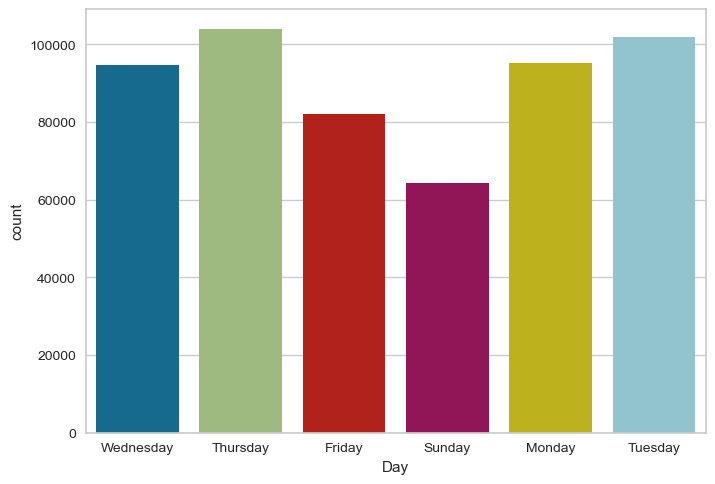

In [115]:
# count plot for the day
sns.countplot(x=df1["Day"])

In [116]:
# Extract Month from datetime column
def Extract_Month(m):
    return cr.month_name[m.weekday()]

In [117]:
df1['Month']=df1['InvoiceDate'].apply(Extract_Month)
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month
0,536365,2010-12-01 08:26:00,6,2.55,Wednesday,February
1,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February
2,536365,2010-12-01 08:26:00,8,2.75,Wednesday,February
3,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February
4,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February
...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,Friday,April
541905,581587,2011-12-09 12:50:00,6,2.10,Friday,April
541906,581587,2011-12-09 12:50:00,4,4.15,Friday,April
541907,581587,2011-12-09 12:50:00,4,4.15,Friday,April


In [118]:
df1['Total'] = df1['Quantity']*df1['UnitPrice']
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total
0,536365,2010-12-01 08:26:00,6,2.55,Wednesday,February,15.30
1,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February,20.34
2,536365,2010-12-01 08:26:00,8,2.75,Wednesday,February,22.00
3,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February,20.34
4,536365,2010-12-01 08:26:00,6,3.39,Wednesday,February,20.34
...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,Friday,April,10.20
541905,581587,2011-12-09 12:50:00,6,2.10,Friday,April,12.60
541906,581587,2011-12-09 12:50:00,4,4.15,Friday,April,16.60
541907,581587,2011-12-09 12:50:00,4,4.15,Friday,April,16.60


In [119]:
seg_map1={
    r'[1][1-2][2-3]':"Inactive",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    #r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'Target-upsell',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFM_Score["Segment"]=RFM_Score["RFM_ID"].replace(seg_map,regex=True)

In [120]:
cr.day_name[df1["InvoiceDate"][0].weekday()]

'Wednesday'

In [121]:
cr.month_name[df1["InvoiceDate"][541904].weekday()]

'April'

In [122]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [123]:
 df = df.loc[df['Country'] == 'United Kingdom']

In [124]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
lower          493807
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [125]:
df.dropna(inplace=True)

In [126]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
lower          0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [127]:
#How many product in the dataset?
df["Description"].value_counts()

HAND WARMER SCOTTY DOG DESIGN         12
WHITE HANGING HEART T-LIGHT HOLDER    11
HAND WARMER RED RETROSPOT             10
JAM MAKING SET PRINTED                10
HAND WARMER UNION JACK                10
                                      ..
LIGHT GARLAND BUTTERFILES PINK         1
VINTAGE SNAP CARDS                     1
WICKER STAR                            1
WOODEN OWLS LIGHT GARLAND              1
CHARLOTTE BAG SUKI DESIGN              1
Name: Description, Length: 718, dtype: int64

In [128]:
# 10 most ordered products from Max quanity to Min Quantity
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
NAMASTE SWAGAT INCENSE,600
BLACK RECORD COVER FRAME,480
RED TOADSTOOL LED NIGHT LIGHT,441
FAIRY TALE COTTAGE NIGHTLIGHT,432
DISCO BALL CHRISTMAS DECORATION,312
JUMBO BAG RED RETROSPOT,254
PAPER CHAIN KIT 50'S CHRISTMAS,217
ASSORTED COLOUR BIRD ORNAMENT,216
HAND WARMER SCOTTY DOG DESIGN,213


In [129]:
df1.groupby(["Month"]).count()

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Total
Month,,,,,,
,95111,95111,95111,95111,95111,95111
April,82193,82193,82193,82193,82193,82193
February,94565,94565,94565,94565,94565,94565
January,101808,101808,101808,101808,101808,101808
June,64375,64375,64375,64375,64375,64375
March,103857,103857,103857,103857,103857,103857


In [130]:
df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True).head(10)

,Total
Month,
,1588609.431
April,1540610.811
February,1734147.010
January,1966182.791
June,805678.891
March,2112519.000


In [131]:
cust=df1.groupby(["Month"]).sum()

In [132]:
df1["Month"].isnull().sum()

0

In [133]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [134]:
df1['year']=df1['InvoiceDate'].dt.year
df1['Month']=df1['InvoiceDate'].dt.month
df1['Day']=df1['InvoiceDate'].dt.day
df1['Season'] = df1.Month%12//3+1


In [135]:
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total,year,Season
0,536365,2010-12-01 08:26:00,6,2.55,1,12,15.30,2010,1
1,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
2,536365,2010-12-01 08:26:00,8,2.75,1,12,22.00,2010,1
3,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
4,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,9,12,10.20,2011,1
541905,581587,2011-12-09 12:50:00,6,2.10,9,12,12.60,2011,1
541906,581587,2011-12-09 12:50:00,4,4.15,9,12,16.60,2011,1
541907,581587,2011-12-09 12:50:00,4,4.15,9,12,16.60,2011,1


In [136]:
df1["Season"].unique()

array([1, 2, 3, 4])

In [137]:
Monthly_sales = df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True)

In [138]:
Monthly_sales

,Total
Month,
1,560000.260
2,498062.650
3,683267.080
4,493207.121
5,723333.510
6,691123.120
7,681300.111
8,682680.510
9,1019687.622


In [139]:
#df1["Sales_Monthly"]  =  df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True)

In [140]:
#df1.drop('Monthly_Sales',axis=1, inplace=True)

In [141]:
#df1.drop('Sales_Monthly',axis=1,inplace=True)

In [142]:
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total,year,Season
0,536365,2010-12-01 08:26:00,6,2.55,1,12,15.30,2010,1
1,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
2,536365,2010-12-01 08:26:00,8,2.75,1,12,22.00,2010,1
3,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
4,536365,2010-12-01 08:26:00,6,3.39,1,12,20.34,2010,1
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,9,12,10.20,2011,1
541905,581587,2011-12-09 12:50:00,6,2.10,9,12,12.60,2011,1
541906,581587,2011-12-09 12:50:00,4,4.15,9,12,16.60,2011,1
541907,581587,2011-12-09 12:50:00,4,4.15,9,12,16.60,2011,1


In [143]:
Monthly_Sales = df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True)

In [144]:
import calendar
df1['Month'] = df1['Month'].apply(lambda x: calendar.month_name[x])

In [145]:
df1['Month']

0         December
1         December
2         December
3         December
4         December
            ...   
541904    December
541905    December
541906    December
541907    December
541908    December
Name: Month, Length: 541909, dtype: object

In [146]:
df1


,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total,year,Season
0,536365,2010-12-01 08:26:00,6,2.55,1,December,15.30,2010,1
1,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
2,536365,2010-12-01 08:26:00,8,2.75,1,December,22.00,2010,1
3,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
4,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,9,December,10.20,2011,1
541905,581587,2011-12-09 12:50:00,6,2.10,9,December,12.60,2011,1
541906,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1
541907,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1


In [147]:
Monthly_sales = df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True)

In [148]:
Monthly_sales

,Total
Month,
April,493207.121
August,682680.510
December,1182625.030
February,498062.650
January,560000.260
July,681300.111
June,691123.120
March,683267.080
May,723333.510


In [149]:
#df1["Monthly_Sales"]=df1.groupby("Month").agg({"Total":"sum"}).sort_values(["Month","Total"], ascending=True)

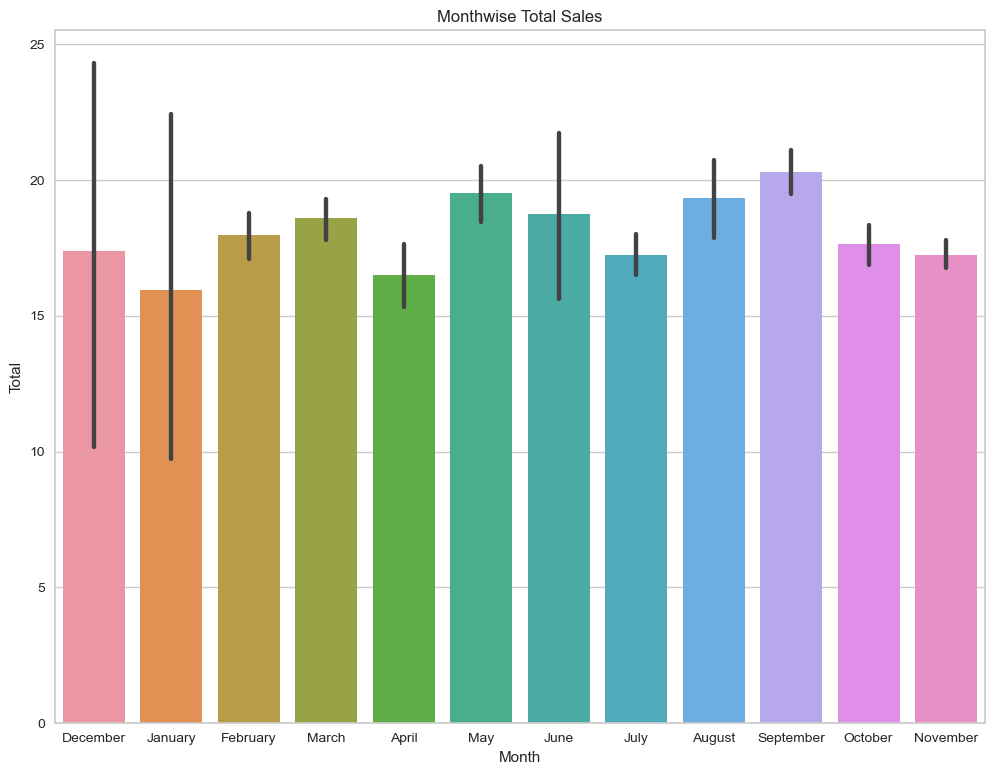

In [150]:
plt.figure(figsize = (12,9))
plt.title('Monthwise Total Sales')
plt.axes
sns.barplot(data=Monthly_sales,x=df1['Month'],y=df1['Total'])
plt.show()

In [151]:
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total,year,Season
0,536365,2010-12-01 08:26:00,6,2.55,1,December,15.30,2010,1
1,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
2,536365,2010-12-01 08:26:00,8,2.75,1,December,22.00,2010,1
3,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
4,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,9,December,10.20,2011,1
541905,581587,2011-12-09 12:50:00,6,2.10,9,December,12.60,2011,1
541906,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1
541907,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1


In [152]:
cust_df=pd.read_excel("Customer_Segment.xlsx")
cust_df

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [153]:
cust_df['Country'].nunique()

38

In [154]:
cust_df['Total']= cust_df['Quantity']*cust_df['UnitPrice']

In [155]:
cust_df

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [156]:
countrywise_Total=cust_df.groupby("Country").agg({"Total":"sum"}).sort_values(["Country","Total"], ascending=True)

In [157]:
countrywise_Total

,Total
Country,
Australia,137077.270
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20086.290
Cyprus,12946.290
Czech Republic,707.720


In [158]:
cust_df

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,NaN,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,NaN,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,NaN,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,NaN,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [159]:
cust_df1 = cust_df.drop(['lower', 'StockCode'], axis=1)

In [160]:
cust_df1

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [161]:
cust_df1.isnull().sum()

InvoiceNo           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total               0
dtype: int64

In [162]:
cust_df1.dropna(subset=['CustomerID', 'Description'],inplace=True)

In [163]:
cust_df1.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total          0
dtype: int64

In [164]:
cust_df1.shape

(406829, 8)

In [165]:
df1

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,Day,Month,Total,year,Season
0,536365,2010-12-01 08:26:00,6,2.55,1,December,15.30,2010,1
1,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
2,536365,2010-12-01 08:26:00,8,2.75,1,December,22.00,2010,1
3,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
4,536365,2010-12-01 08:26:00,6,3.39,1,December,20.34,2010,1
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12,0.85,9,December,10.20,2011,1
541905,581587,2011-12-09 12:50:00,6,2.10,9,December,12.60,2011,1
541906,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1
541907,581587,2011-12-09 12:50:00,4,4.15,9,December,16.60,2011,1


In [166]:
df_new=df1.drop(['InvoiceDate','Quantity','UnitPrice','Total'], axis=1)

In [167]:
df_new

,InvoiceNo,Day,Month,year,Season
0,536365,1,December,2010,1
1,536365,1,December,2010,1
2,536365,1,December,2010,1
3,536365,1,December,2010,1
4,536365,1,December,2010,1
...,...,...,...,...,...
541904,581587,9,December,2011,1
541905,581587,9,December,2011,1
541906,581587,9,December,2011,1
541907,581587,9,December,2011,1


In [168]:
df_new.shape

(541909, 5)

In [169]:
df1.shape

(541909, 9)

In [170]:
df1.isnull().sum()

InvoiceNo      0
InvoiceDate    0
Quantity       0
UnitPrice      0
Day            0
Month          0
Total          0
year           0
Season         0
dtype: int64

In [171]:
df_new.shape

(541909, 5)

In [172]:
cust_df1.shape

(406829, 8)

In [173]:
data=pd.merge(cust_df1, df_new, how='right', on='InvoiceNo',copy=True)

In [174]:
data.isnull().sum()

InvoiceNo           0
Description    135080
Quantity       135080
InvoiceDate    135080
UnitPrice      135080
CustomerID     135080
Country        135080
Total          135080
Day                 0
Month               0
year                0
Season              0
dtype: int64

In [175]:
data.dropna(subset=['Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'], inplace=True)

In [176]:
data.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total          0
Day            0
Month          0
year           0
Season         0
dtype: int64

In [177]:
data.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
20260046     True
20260047     True
20260048     True
20260049     True
20260050     True
Length: 20124971, dtype: bool

In [178]:
data=data.drop_duplicates()

In [179]:
data.shape

(401568, 12)

In [180]:
data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Day,Month,year,Season
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,December,2010,1
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,December,2010,1
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20259836,581587,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9,December,2011,1
20259837,581587,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,December,2011,1
20259838,581587,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,December,2011,1
20259839,581587,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,December,2011,1


In [181]:
data.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'Total', 'Day', 'Month', 'year', 'Season'],
      dtype='object')

In [182]:
countrywise_Total=data.groupby("Country").agg({"Total":"sum"}).sort_values(["Country","Total"], ascending=True)

In [183]:
countrywise_Total

,Total
Country,
Australia,137009.770
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20076.390
Cyprus,12850.360
Czech Republic,707.720


In [184]:
Seasonwise_Total=data.groupby("Season").agg({"Total":"sum"}).sort_values(["Season","Total"], ascending=True)

In [185]:
Seasonwise_Total

,Total
Season,
1,1803096.060
2,1650761.251
3,1795037.931
4,3029457.682


<AxesSubplot:xlabel='Season', ylabel='Total'>

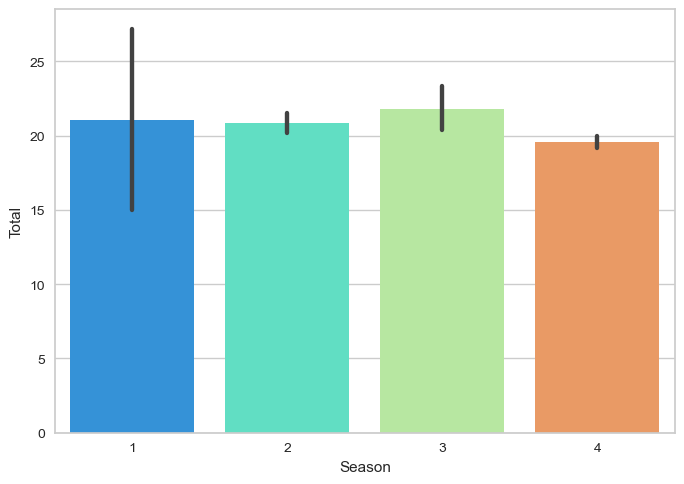

In [186]:
sns.barplot(data=data,x="Season",y="Total",palette='rainbow')

In [187]:
months_to_seasons = {
    "January": "Winter",
    "February": "Winter",
    "March": "Spring",
    "April": "Spring",
    "May": "Spring",
    "June": "Summer",
    "July": "Summer",
    "August": "Summer",
    "September": "Autumn",
    "October": "Autumn",
    "November": "Autumn",
    "December": "Winter"
}


In [188]:
data_new = data.copy()

In [189]:
data_new["Season_Segment"] = data_new["Month"].replace(months_to_seasons, regex=True)

In [190]:
data_new

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Day,Month,year,Season,Season_Segment
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,December,2010,1,Winter
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1,Winter
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,December,2010,1,Winter
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1,Winter
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,December,2010,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20259836,581587,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9,December,2011,1,Winter
20259837,581587,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,December,2011,1,Winter
20259838,581587,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,December,2011,1,Winter
20259839,581587,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,December,2011,1,Winter


In [191]:
Seasonwise_Total=data_new.groupby("Season_Segment").agg({"Total":"sum"}).sort_values(["Season_Segment","Total"], ascending=True)

In [192]:
Seasonwise_Total

,Total
Season_Segment,
Autumn,3029457.682
Spring,1650761.251
Summer,1795037.931
Winter,1803096.060
